# Bigram Character-Level Language Model
## Cleaner Vesion of Generating Text

# Introduction

In this notebook, we explore how to build a **Bigram Character-Level Language Model** to generate new names.
The workflow is inspired by classic statistical language modeling techniques, where we calculate the frequency of character pairs (bigrams) and use them to model probabilities of what character comes next in a sequence.

Key steps:
- Read and preprocess a dataset of names.
- Build a character-to-index (`stoi`) and index-to-character (`itos`) mapping.
- Construct a **count tensor** that captures how often each bigram appears in the dataset.
- Normalize this count tensor to form a probability matrix.
- Use **multinomial sampling** to generate new names character by character.
- Calculate the **loss** using Negative Log-Likelihood (NLL) to evaluate the model on both training data and unseen examples.

This simple bigram approach provides an introduction to how language models learn sequential patterns.



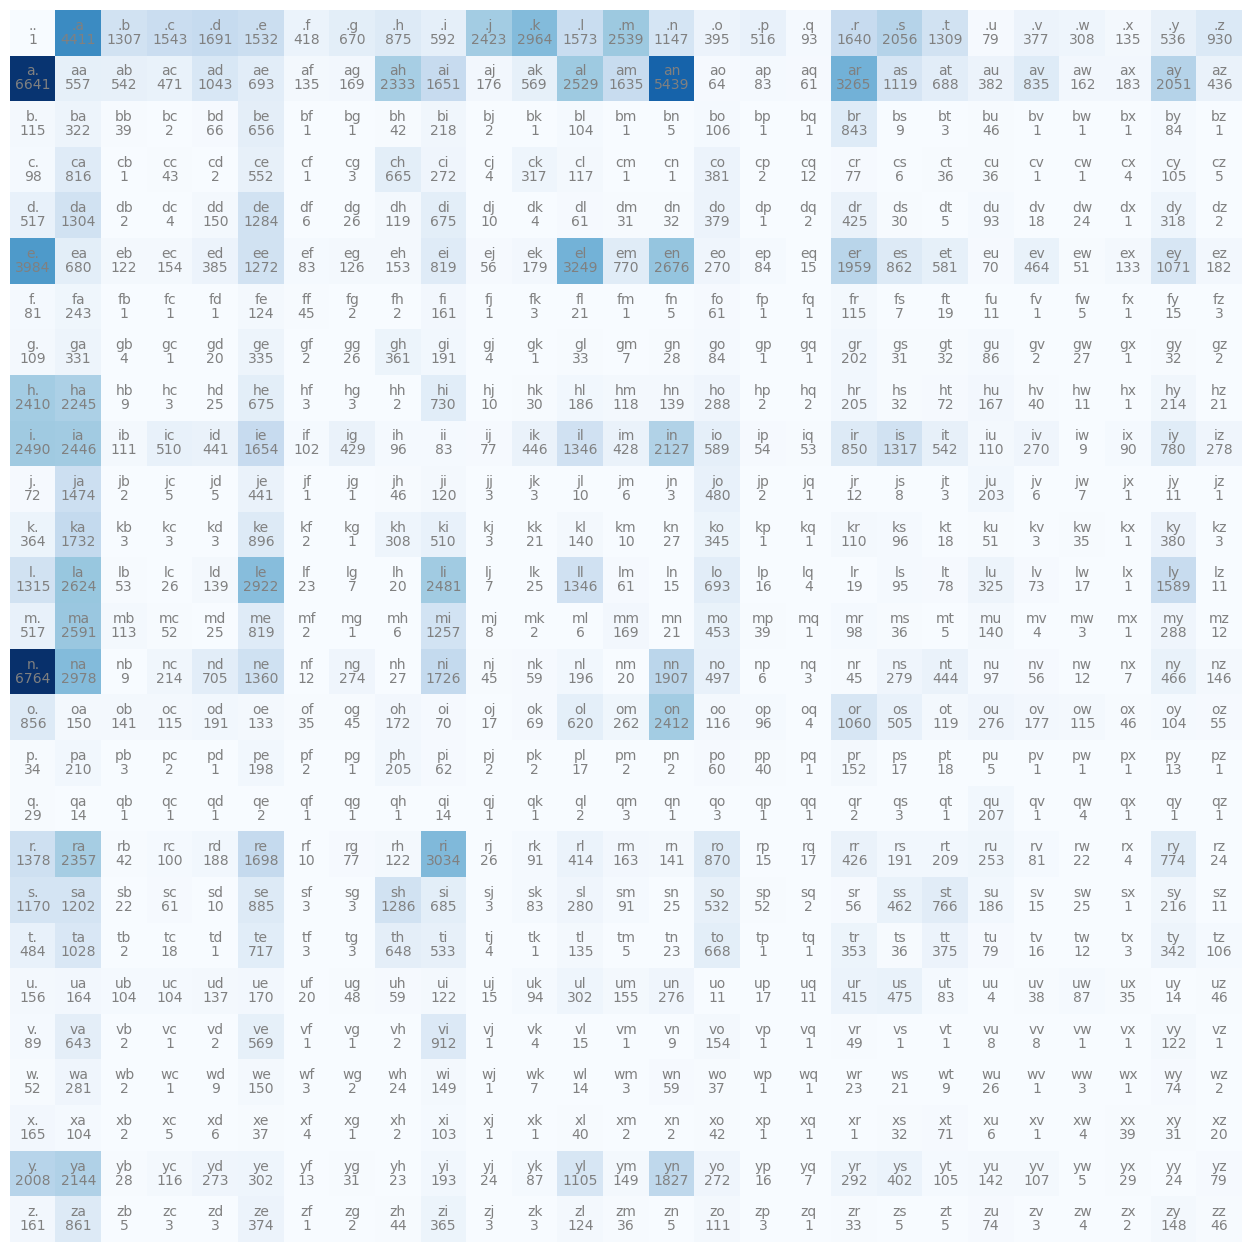

In [14]:
import pandas as pd
import torch 
words = open('names.txt').read().splitlines()
chars = sorted(list(set(''.join(words))))

stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0

itos = {i: s for s, i in stoi.items()}

N = torch.zeros((27,27), dtype = torch.int32) # we have only 27 charcters

#for whole dataset 
Count_Tensor = N+1
for w in words:
    chs = ['.'] + list(w)+['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        #print(ch1,':',ix1 ,'&', ch2,':', ix2)
        Count_Tensor[ix1, ix2] += 1
pd.DataFrame(Count_Tensor)
import matplotlib.pyplot as plt

#%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(Count_Tensor, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, Count_Tensor[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')
plt.show()

## Example of how torch generator generates same deterministic results

In [15]:
starting_char = 'b'
prob_dot = Count_Tensor[stoi[starting_char]].float()
prob_dot = prob_dot/prob_dot.sum()
pd.DataFrame(prob_dot)

g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(prob_dot, num_samples=1, replacement=True, generator=g).item()
print(f"ix : {ix} ,  char :{itos[ix]}")

ix : 18 ,  char :r


In [16]:
prob_count_matrix = Count_Tensor.float()
prob_count_matrix = prob_count_matrix/prob_count_matrix.sum(1,keepdims=True)
pd.DataFrame(prob_count_matrix)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.000031,0.137586,0.040767,0.048129,0.052745,0.047785,0.013038,0.020898,0.027293,0.018465,...,0.002901,0.051154,0.064130,0.040830,0.002464,0.011759,0.009607,0.004211,0.016719,0.029008
1,0.195830,0.016425,0.015983,0.013889,0.030756,0.020435,0.003981,0.004983,0.068796,0.048685,...,0.001799,0.096279,0.032997,0.020288,0.011264,0.024623,0.004777,0.005396,0.060480,0.012857
2,0.043039,0.120509,0.014596,0.000749,0.024701,0.245509,0.000374,0.000374,0.015719,0.081587,...,0.000374,0.315494,0.003368,0.001123,0.017216,0.000374,0.000374,0.000374,0.031437,0.000374
3,0.027536,0.229278,0.000281,0.012082,0.000562,0.155100,0.000281,0.000843,0.186850,0.076426,...,0.003372,0.021635,0.001686,0.010115,0.010115,0.000281,0.000281,0.001124,0.029503,0.001405
4,0.093609,0.236104,0.000362,0.000724,0.027159,0.232482,0.001086,0.004708,0.021546,0.122216,...,0.000362,0.076951,0.005432,0.000905,0.016839,0.003259,0.004345,0.000181,0.057577,0.000362
5,0.194817,0.033252,0.005966,0.007531,0.018826,0.062200,0.004059,0.006161,0.007482,0.040049,...,0.000733,0.095795,0.042152,0.028411,0.003423,0.022689,0.002494,0.006504,0.052372,0.008900
6,0.086910,0.260730,0.001073,0.001073,0.001073,0.133047,0.048283,0.002146,0.002146,0.172747,...,0.001073,0.123391,0.007511,0.020386,0.011803,0.001073,0.005365,0.001073,0.016094,0.003219
7,0.055783,0.169396,0.002047,0.000512,0.010235,0.171443,0.001024,0.013306,0.184749,0.097748,...,0.000512,0.103378,0.015865,0.016377,0.044012,0.001024,0.013818,0.000512,0.016377,0.001024
8,0.315321,0.293733,0.001178,0.000393,0.003271,0.088316,0.000393,0.000393,0.000262,0.095512,...,0.000262,0.026822,0.004187,0.009420,0.021850,0.005234,0.001439,0.000131,0.027999,0.002748
9,0.140456,0.137974,0.006261,0.028768,0.024876,0.093299,0.005754,0.024199,0.005415,0.004682,...,0.002990,0.047947,0.074289,0.030573,0.006205,0.015230,0.000508,0.005077,0.043998,0.015681


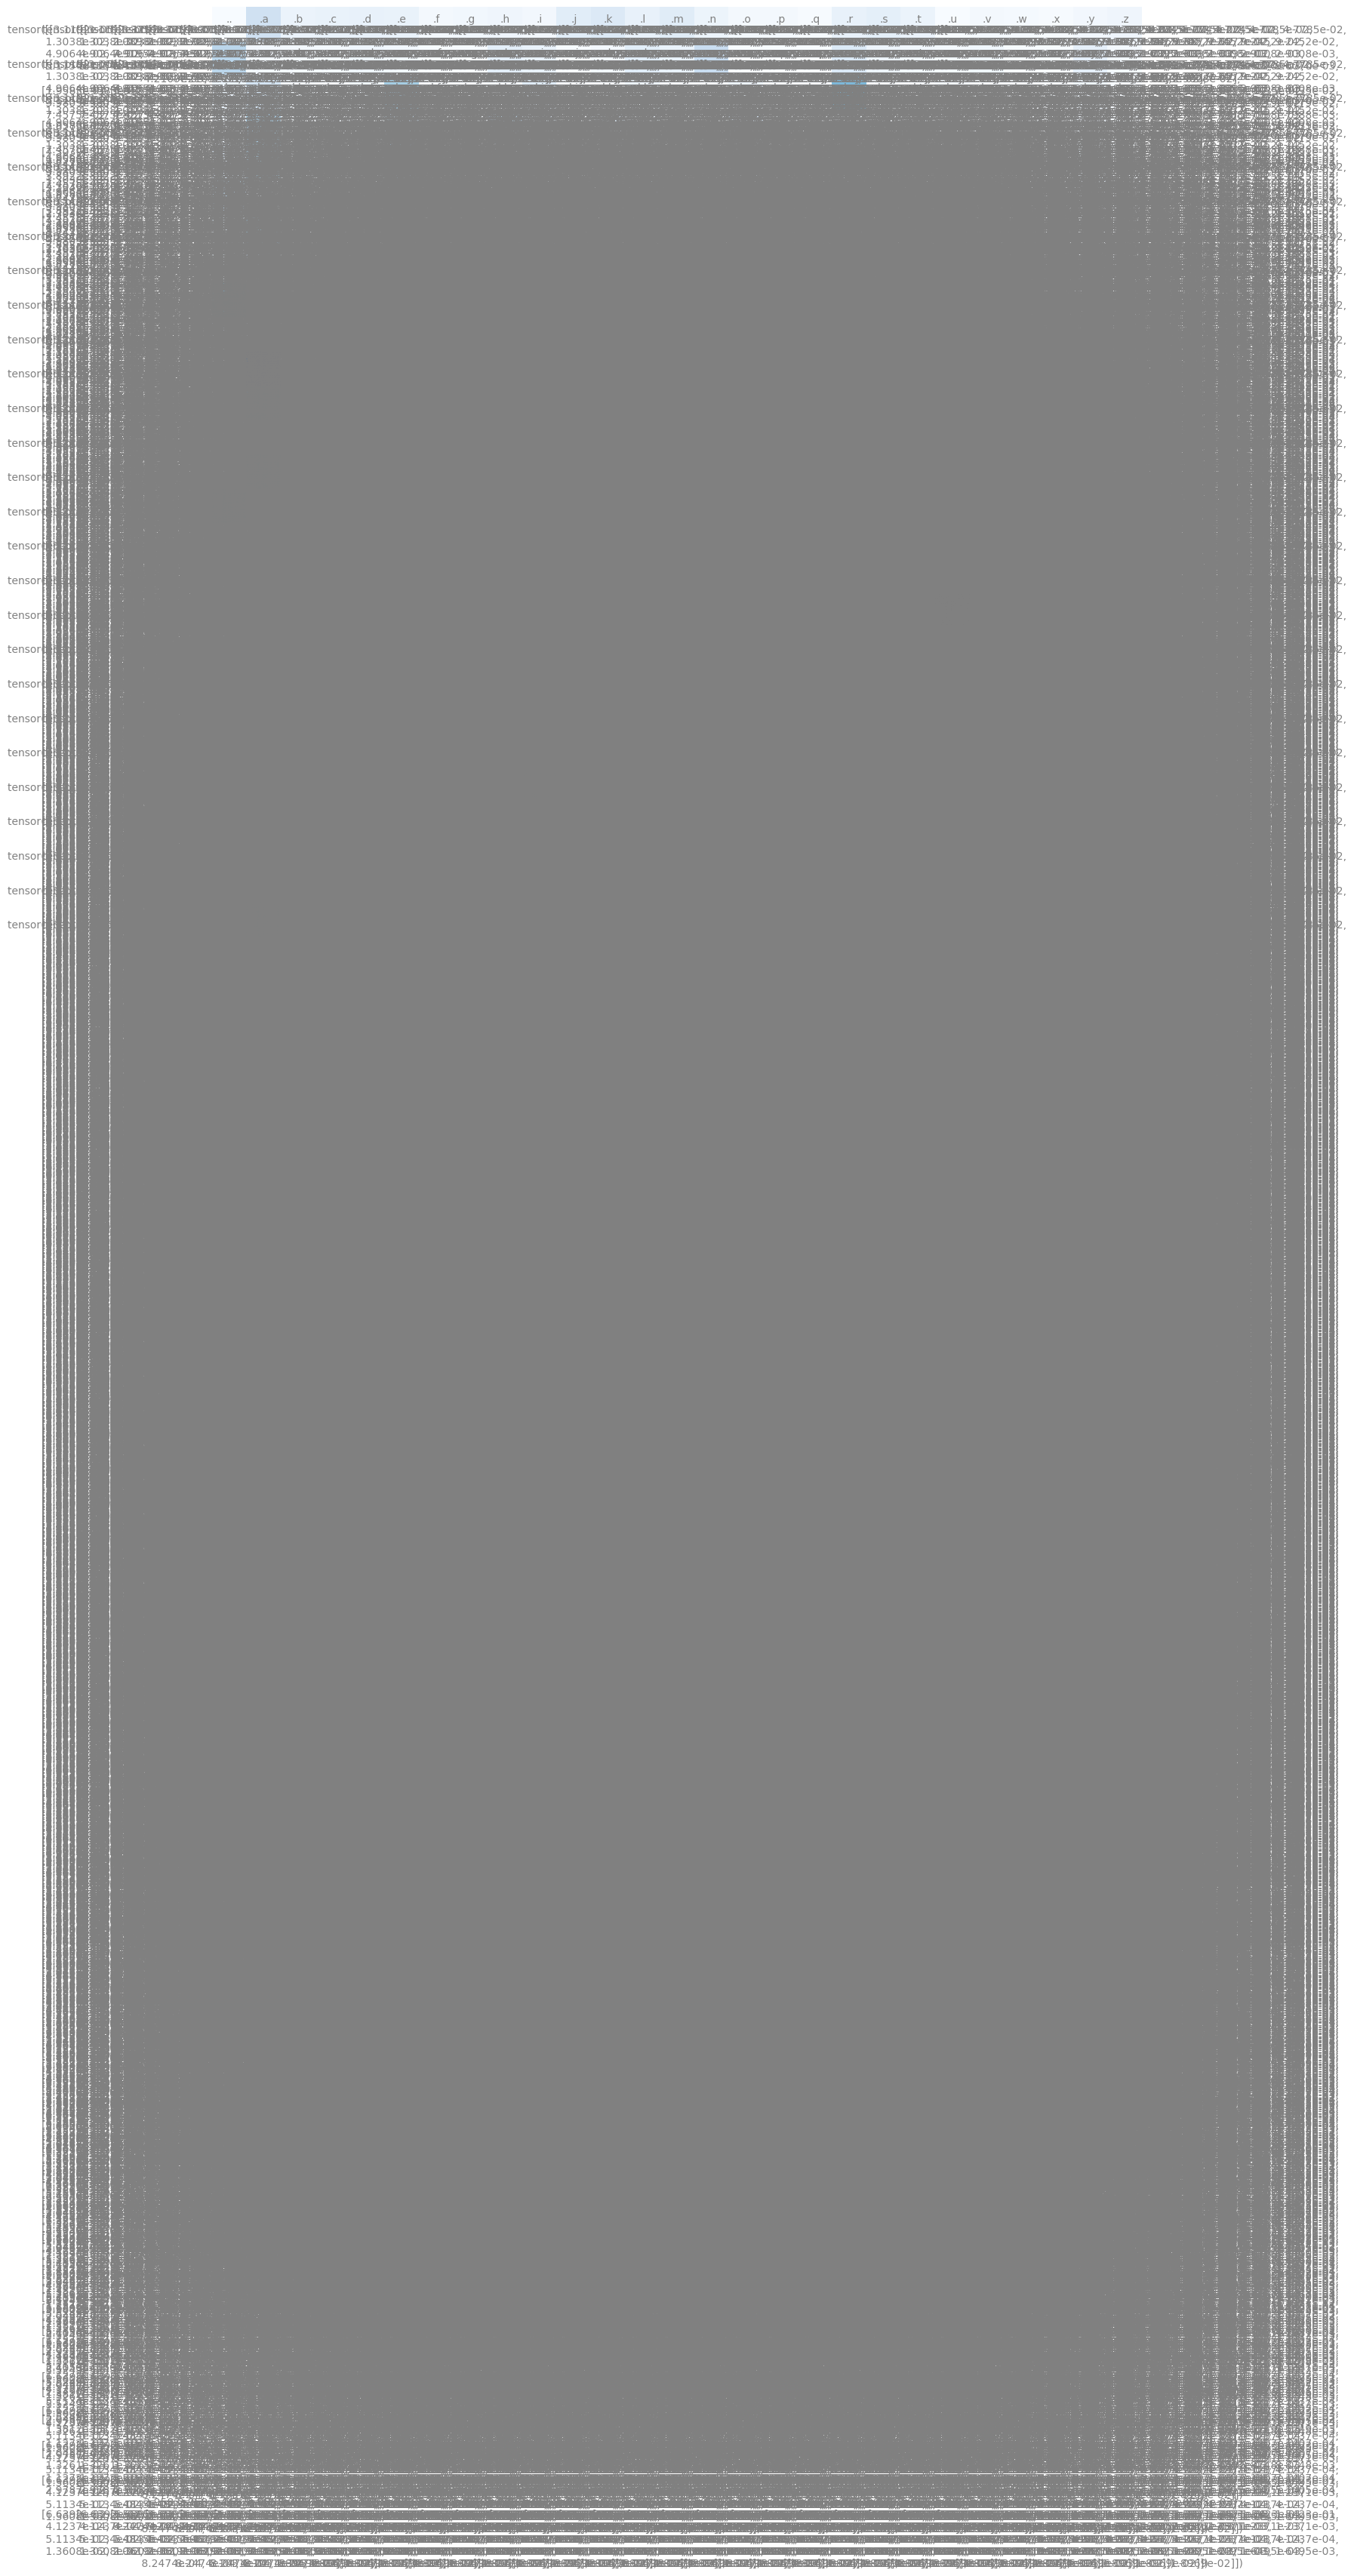

In [19]:
import math
plt.figure(figsize=(16, 16))
plt.imshow(prob_count_matrix, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, prob_count_matrix, ha='center', va='top', color='gray')
plt.axis('off')
plt.show()

## Single name generation

In [12]:
g = torch.Generator().manual_seed(2147483647)

index_start_character = 0  #let's consider starting character is '.' whose index is 0, because in training our name starts and end with this char('.')  , so if the ix prediction is dot again we will stop the loop.

output = []  #this is the list where we want to store the output
while True:
    Probability_ix = Count_Tensor[index_start_character].float() 
    Probability_ix = Probability_ix/Probability_ix.sum() # we are taking the probability distribution of the current word and to determine what comes next
    index_start_character = torch.multinomial(Probability_ix, num_samples=1, generator= g, replacement=True).item() # here we pass that sample distribution(using probability of index) so the multinomial function generates the deterministic result for the next prediction character
    output.append(itos[index_start_character]) # we will append it to list 
    if index_start_character == 0:
        break
print(''.join(output))


junide.


### Summary of Name Generation Process

- We begin with the **start character** `"."` (index = 0), since all names in the dataset start and end with this special token.
- From this, we compute the **probability distribution** of what character is most likely to come next.
- Using the **multinomial function**, we sample the next character based on this distribution.

Example sequence:
1. Loop 1: Input = `"."` → Output = `"j"`
2. Loop 2: Input = `"j"` → Output = `"u"`
3. Loop 3: Input = `"u"` → Output = `"n"`
...
n. Final loop: Input = `"e"` → Output = `"."` (end of name)

- When the sampled output is `"."` (index = 0), the loop stops and the name is complete.
- Since we use a **deterministic generator** (`g`), the multinomial function always gives the **same output for the same input distribution**.
- This ensures reproducibility: each run produces the same sequence of characters for a given random seed.


In [ ]:
"""
To sum up, We are taking the start character is '.'(i.e., index ix =0) because our names are started and ended with '.' character. Then we pass the probabilty distrubution of what comes next when start charcter is '.'. 
after that we will use multinomial function to generate what character comes next 

so in loop 1 i/p character is '.' o/p character is 'j'
in loop 2 i/p character is 'j' o/p character is 'u'
in loop 3 i/p character is 'u' o/p character is 'n'

..
in loop  n i/p charcter is 'e' o/p character is '.'

we got index_start_character = 0 then we will stop generating the loop

multinomial Function this wau we set genertor =g which always provide deterministic results   like when input is X o/p is always Y based on  probability distribution

every time ouytput is generted by the multinomial function
"""

In [54]:
for i in range(0,20):    
    ix = 0
    output = []
    while True:
        Probability_ix = Count_Tensor[ix].float()
        Probability_ix = Probability_ix/Probability_ix.sum()
        ix = torch.multinomial(Probability_ix, num_samples=1, generator= g, replacement=True).item()
        output.append(itos[ix])
        if ix == 0:
            break
    print(''.join(output))

marafrlanlylialeyngarirriyli.
msoireviayitarkannzyaneniadahulyl.
cichatavryaelesh.
rla.
s.
jau.
brialieri.
kha.
nerarh.
hisisarilakamorvann.
akela.
az.
arileri.
chaiadayra.
fbalodouseyton.
za.
sabran.
han.
ke.
etamete.


In [61]:
#to make it more smooth

#for whole dataset 
Count_Tensor = N + 19
for w in words:
    chs = ['.'] + list(w)+['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        #print(ch1,':',ix1 ,'&', ch2,':', ix2)
        Count_Tensor[ix1, ix2] += 1
        
for i in range(0,20):    
    ix = 0
    output = []
    while True:
        Probability_ix = Count_Tensor[ix].float()
        Probability_ix = Probability_ix/Probability_ix.sum()
        ix = torch.multinomial(Probability_ix, num_samples=1, generator= g, replacement=True).item()
        output.append(itos[ix])
        if ix == 0:
            break
    print(''.join(output))

syayardoeexid.
yeshaun.
n.
fdy.
deliavica.
kql.
kzmbakonubana.
vamiarckantpsa.
siysirasavanee.
a.
yn.
an.
jan.
ht.
taytryaabees.
aste.
n.
zidnaqjs.
telloh.
brem.


## Calculating the loss of model by -ve log likely hood of estimation

In [65]:
log_likelyhood = 0.0
count = 0.0 

for w in words:
    chs = ['.']+ list(w)+ ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ## we are simply going to [x,y](i.e., [ix1,ix2]  location in tensor to see what is their probability: it returns value between 0 and 1 
        # if we do log (0-1) it will be between -4 and 0
        ## loss = avg(all the prediction loss)
        
        probability_of_char = prob_count_matrix[ix1,ix2]
        log_prob = torch.log(probability_of_char)
        log_likelyhood +=log_prob
        count +=1
loss =(-log_likelyhood)/count
print("total model loss is :",loss)


total model loss is : tensor(2.4544)


## Predicting loss for Unseen Data

In [68]:
log_likelyhood = 0.0
count = 0.0 

for w in ["vinay"]:
    chs = ['.']+ list(w)+ ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        
        probability_of_char = prob_count_matrix[ix1,ix2]
        
        log_prob = torch.log(probability_of_char)
        log_likelyhood +=log_prob
        count +=1
        
        print(f'{ch1}{ch2} : {probability_of_char: .4f}' + ', logprob : ' + f'{log_prob: .4f}')
loss =(-log_likelyhood)/count
print("total  prediction word is :",loss)


.v :  0.0118, logprob : -4.4431
vi :  0.3508, logprob : -1.0476
in :  0.1200, logprob : -2.1204
na :  0.1623, logprob : -1.8186
ay :  0.0605, logprob : -2.8054
y. :  0.2048, logprob : -1.5855
total  prediction word is : tensor(2.3035)


# Conclusion

- The **Bigram Model** captures pairwise character relationships and can generate names, but its predictions are often unrealistic (e.g., very short or incomplete names).
- We improved sampling by **smoothing counts** (adding +1 or +19 to the tensor), which avoids zero probabilities and produces smoother results.
- By calculating the **negative log-likelihood**, we evaluated how well the model fits both training and unseen data.
- Results showed that while the bigram model works as a proof-of-concept, it cannot capture longer contexts, leading to poor generalization.
